In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [4]:
import sys
import os
from os.path import dirname

UTILS_PATH=os.environ.get('REPO') + "/notebooks/commons"
sys.path.append(dirname(UTILS_PATH))

from commons import check_args, gen_paths
from commons import coordinates_bounds, plot_feature_importances
from commons import check_args_variables, gen_paths_variables

In [5]:
def load_posts(source_path, clean_path):
    external = pd.read_parquet(source_path)
    external.loc[:, "lat"] = external["lat"].apply(float)
    external.loc[:, "lon"] = external["lon"].apply(float)
    
    fincaraiz = pd.read_parquet(clean_path)
    return external, fincaraiz

In [6]:
if __name__ == "__main__":
    source = "PLACES"
    city = "manizales"
    
    property_type = "casas"
    post_type = "arriendo"
    
    base_path = os.environ.get('REPO')
    
    source_path = base_path + gen_paths_variables(source, city)
    raw_path, clean_path = gen_paths(city, property_type, post_type)
        
    raw_path = base_path + raw_path
    clean_path = base_path + clean_path

In [7]:
external_variables, fincaraiz = load_posts(source_path, clean_path)

In [8]:
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    """
    El resultado de la medición de distancia esta en kilometros.
    """
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

def post_to_place_distance(publications, places, index):
    publication = publications.loc[index]
    
    places_to_point = places.copy()
    places_to_point.loc[:, "fid"] = publication["fid"]
    
    places_to_point.loc[:, "latitide"] = publication["latitude"]
    places_to_point.loc[:, "longitude"] = publication["longitude"]
    
    places_to_point.loc[:, "distance"] = places_to_point.apply(
        lambda e: distance(publication["latitude"], publication["longitude"], e["lat"], e["lon"]), axis=1)
        
    return places_to_point

import functools
from multiprocessing import Pool
def get_near_points(external_variables, fincaraiz):    
    distance_map = functools.partial(
        post_to_place_distance, 
        fincaraiz, external_variables)
    
    pool = Pool(8)
    distances = pool.map(
        distance_map,
        fincaraiz.index
    )

    return pd.concat(distances).reset_index(drop=True)

In [9]:
distances_map = get_near_points(external_variables, fincaraiz)
distances_map.head()

,lat,lon,amenity,name,fid,latitide,longitude,distance
0,5.045668,-75.528992,university,Universidad Antonio Nariño Manizales,3078558,5.06864,-75.517929,2.833033
1,5.045668,-75.528992,university,UAN Universidad Antonio Nariño,3078558,5.06864,-75.517929,2.833033
2,5.001526,-75.598802,university,Mànizales,3078558,5.06864,-75.517929,11.659203
3,4.985796,-75.606928,university,CUN - Corporación Unificada Nacional de Educac...,3078558,5.06864,-75.517929,13.492284
4,4.983539,-75.605624,university,JUZGADO PRIMERO PROMISCUO MUNICIPAL DE CHINCHINÁ,3078558,5.06864,-75.517929,13.561070


In [10]:
distances_map.loc[distances_map["distance"] == distances_map["distance"].min()]

,lat,lon,amenity,name,fid,latitide,longitude,distance
85820,5.070275,-75.513817,university,Yerly natalia López Acevedo,4906791,5.070275,-75.513817,0.0
85821,5.070275,-75.513817,university,Colegio de Jueces y Fiscales de Caldas,4906791,5.070275,-75.513817,0.0
85850,5.070275,-75.513817,shopping_mall,Auditorio unicentro estrella,4906791,5.070275,-75.513817,0.0
85851,5.070275,-75.513817,shopping_mall,El cable plaza,4906791,5.070275,-75.513817,0.0
85852,5.070275,-75.513817,shopping_mall,Ley sancancio,4906791,5.070275,-75.513817,0.0
85902,5.070275,-75.513817,local_government_office,URBAN GREEN,4906791,5.070275,-75.513817,0.0
85917,5.070275,-75.513817,hospital,Antiagua Clinica Manizales,4906791,5.070275,-75.513817,0.0
87056,5.070275,-75.513817,church,The Roman Catholic Diocese of Armenia,4906791,5.070275,-75.513817,0.0
87057,5.070275,-75.513817,church,Parroquia San Pío X,4906791,5.070275,-75.513817,0.0
87511,5.070275,-75.513817,school,CEADMIS,4906791,5.070275,-75.513817,0.0


In [11]:
## Un punto de interes es cercano a la publicicación cuando esta a menos de 3 kilometros

near_points = distances_map.loc[distances_map["distance"] < 3]
near_points.head()

,lat,lon,amenity,name,fid,latitide,longitude,distance
0,5.045668,-75.528992,university,Universidad Antonio Nariño Manizales,3078558,5.06864,-75.517929,2.833033
1,5.045668,-75.528992,university,UAN Universidad Antonio Nariño,3078558,5.06864,-75.517929,2.833033
6,5.067890,-75.523410,school,Universidad de Caldas Sede Bellas Artes,3078558,5.06864,-75.517929,0.612766
7,5.075170,-75.534980,school,Divine Child School,3078558,5.06864,-75.517929,2.023338
8,5.066951,-75.517230,university,Asociacion Educativa,3078558,5.06864,-75.517929,0.203096


In [12]:
near_points.describe()

,lat,lon,latitide,longitude,distance
count,125560.000000,125560.000000,125560.000000,125560.000000,125560.000000
mean,5.059601,-75.498300,5.057931,-75.496317,1.626014
std,0.010170,0.014867,0.008109,0.014727,0.816230
min,5.008881,-75.567656,5.029500,-75.546356,0.000000
25%,5.052784,-75.510340,5.052155,-75.507599,0.943837
50%,5.061331,-75.497405,5.058318,-75.489243,1.638901
75%,5.067074,-75.487568,5.064100,-75.486618,2.330538
max,5.110130,-75.430797,5.091370,-75.457062,2.999998


In [13]:
near_points_by_categories = near_points[["fid", "amenity", "name"]].groupby(["fid", "amenity"]).count()
near_points_by_categories.head()

name
fid     amenity             
2146685 amusement_park     2
        bank             184
        church           126
        hospital          49
        library           12

In [14]:
index = list(zip(*near_points_by_categories.index))
near_points_by_categories.loc[:, "fid"] = index[0]
near_points_by_categories.loc[:, "amenity"] = index[1]
near_points_by_categories.loc[:, "count"] = near_points_by_categories["name"]

near_points_by_categories = near_points_by_categories.reset_index(drop=True)
near_points_by_categories = near_points_by_categories.drop(["name"], axis=1)
near_points_by_categories.head()

,fid,amenity,count
0,2146685,amusement_park,2
1,2146685,bank,184
2,2146685,church,126
3,2146685,hospital,49
4,2146685,library,12


In [15]:
posts_full = fincaraiz[["fid"]].copy()
posts_full = posts_full.drop_duplicates(["fid"])

def safe_get(post, amenity):
    client = near_points_by_categories.loc[
        near_points_by_categories["fid"] == post["fid"]]
    
    if client.shape[0] == 0:
        return 0
    
    client = client.loc[client["amenity"] == amenity]
    if client.shape[0] == 0:
        return 0
    
    return client["count"].iloc[0]

In [16]:
for amenity in external_variables["amenity"].value_counts().index:
    posts_full.loc[:, amenity] = posts_full.apply(lambda e: safe_get(e, amenity), axis=1)

In [17]:
posts_full["airport"].describe()

count    99.000000
mean      0.202020
std       0.403551
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: airport, dtype: float64

In [18]:
## Las features y las etiquetas son las mismas en todos los métodos

FEATURES = list(filter(lambda e: e != "fid", posts_full.columns))
LABEL = "price"

final_features = pd.merge(posts_full, fincaraiz[["fid", "price"]], on="fid")

X = final_features[FEATURES].values
y = final_features[LABEL].values

## Selección de features univariada

In [19]:
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)
X_new.shape

(99, 5)

In [20]:
feature_importances = pd.DataFrame({'importance': selector.scores_, 'feature': FEATURES})

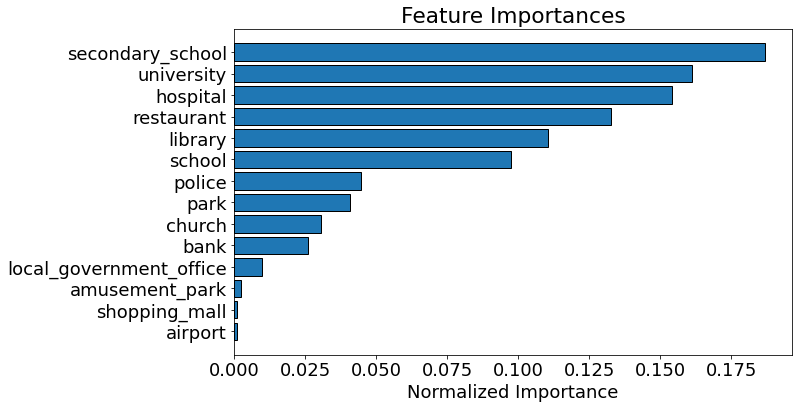

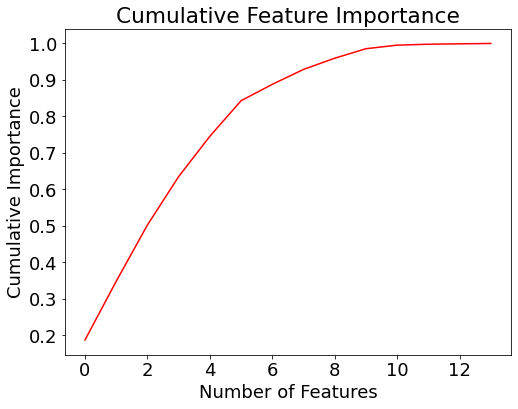

8 features required for 0.90 of cumulative importance


,index,importance,feature,importance_normalized,cumulative_importance
0,10,5.767602,secondary_school,0.186970,0.186970
1,7,4.965957,university,0.160983,0.347954
2,6,4.757282,hospital,0.154219,0.502172
3,0,4.095871,restaurant,0.132777,0.634949
4,11,3.410452,library,0.110558,0.745507
5,1,3.009096,school,0.097547,0.843054
6,9,1.384210,police,0.044872,0.887927
7,4,1.262277,park,0.040920,0.928846
8,3,0.948046,church,0.030733,0.959579
9,2,0.803016,bank,0.026032,0.985611


In [21]:
plot_feature_importances(feature_importances)

## Eliminación recursiva de features

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [23]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.20760848924738762

In [24]:
rfe = RFE(estimator=reg, n_features_to_select=1, step=1)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [25]:
feature_importances = pd.DataFrame({'importance': rfe.ranking_, 'feature': FEATURES})

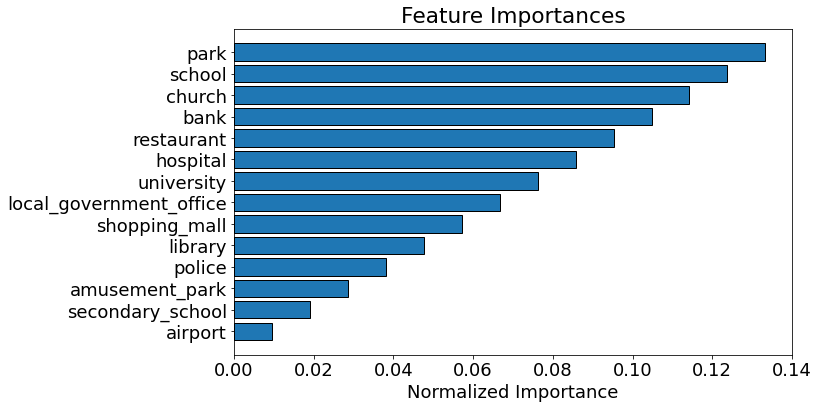

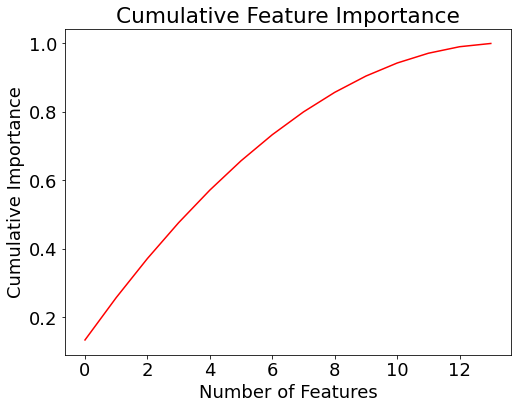

10 features required for 0.90 of cumulative importance


,index,importance,feature,importance_normalized,cumulative_importance
0,4,14,park,0.133333,0.133333
1,1,13,school,0.123810,0.257143
2,3,12,church,0.114286,0.371429
3,2,11,bank,0.104762,0.476190
4,0,10,restaurant,0.095238,0.571429
5,6,9,hospital,0.085714,0.657143
6,7,8,university,0.076190,0.733333
7,8,7,local_government_office,0.066667,0.800000
8,5,6,shopping_mall,0.057143,0.857143
9,11,5,library,0.047619,0.904762


In [26]:
plot_feature_importances(feature_importances)

## Selección de features basada en arboles

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

In [28]:
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)

ExtraTreesRegressor(random_state=0)

In [29]:
feature_importances = pd.DataFrame({'importance':  forest.feature_importances_, 'feature': FEATURES})

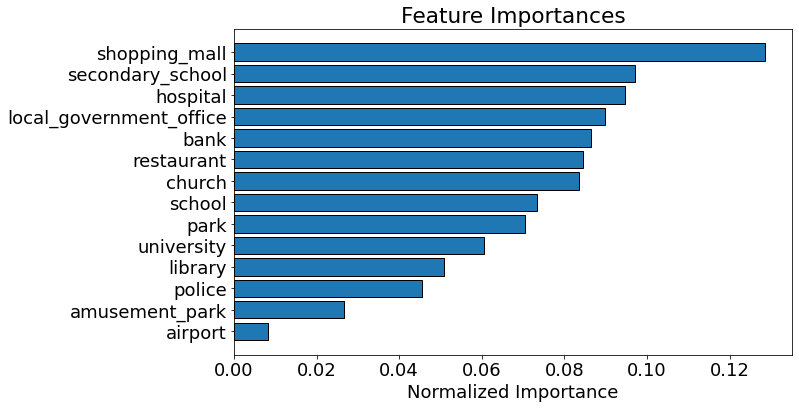

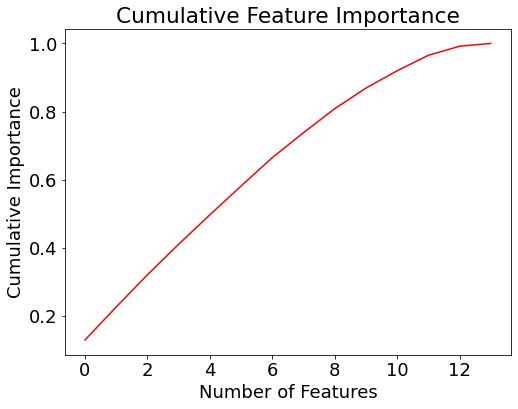

11 features required for 0.90 of cumulative importance


,index,importance,feature,importance_normalized,cumulative_importance
0,5,0.128643,shopping_mall,0.128643,0.128643
1,10,0.096976,secondary_school,0.096976,0.225620
2,6,0.094554,hospital,0.094554,0.320174
3,8,0.089714,local_government_office,0.089714,0.409888
4,2,0.086524,bank,0.086524,0.496412
5,0,0.084614,restaurant,0.084614,0.581026
6,3,0.083515,church,0.083515,0.664541
7,1,0.073330,school,0.073330,0.737871
8,4,0.070447,park,0.070447,0.808318
9,7,0.060489,university,0.060489,0.868807


In [30]:
plot_feature_importances(feature_importances)